Epoch 1/10


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0798 - loss: 2.5074 - val_accuracy: 0.0850 - val_loss: 2.3830
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0770 - loss: 2.4130 - val_accuracy: 0.0750 - val_loss: 2.3624
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0688 - loss: 2.3875 - val_accuracy: 0.0850 - val_loss: 2.3520
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1161 - loss: 2.3461 - val_accuracy: 0.1000 - val_loss: 2.3458
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1250 - loss: 2.3238 - val_accuracy: 0.1100 - val_loss: 2.3424
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0878 - loss: 2.3693 - val_accuracy: 0.1100 - val_loss: 2.3391
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1026 - loss: 2.3387 - val_accuracy: 0.0950 - val_loss: 2.3374
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1146 - loss: 2.3176 - val_accuracy: 0.0950 - val_loss: 2.3378
Epo

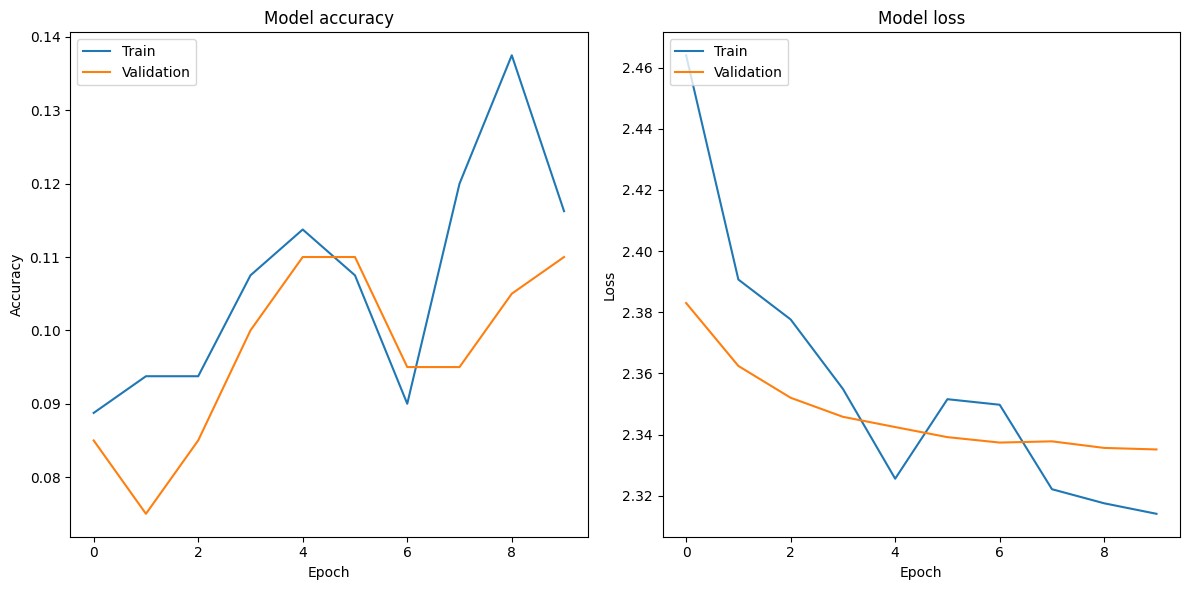

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

np.random.seed(42)
X_train = np.random.rand(1000, 784)
y_train = np.random.randint(0, 10, size=(1000,))

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

sgd = SGD(clipnorm=0.5)

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Epoch 1/10, Loss: 0.16633918045525137, Accuracy: 0.6670842690422306
Epoch 2/10, Loss: 0.16478746996781296, Accuracy: 0.23113763553462408
Epoch 3/10, Loss: 0.16710466027363122, Accuracy: 0.9165051605643532
Epoch 4/10, Loss: 0.16659569273176994, Accuracy: 0.5273794470488624
Epoch 5/10, Loss: 0.16996177516572075, Accuracy: 0.8211159514122682
Epoch 6/10, Loss: 0.1686255401750953, Accuracy: 0.2630004741046388
Epoch 7/10, Loss: 0.16559427188555115, Accuracy: 0.45243158623072255
Epoch 8/10, Loss: 0.16817756756040714, Accuracy: 0.5195365746468977
Epoch 9/10, Loss: 0.1648717825074295, Accuracy: 0.7210433999711626
Epoch 10/10, Loss: 0.16277165073219932, Accuracy: 0.667154882308012


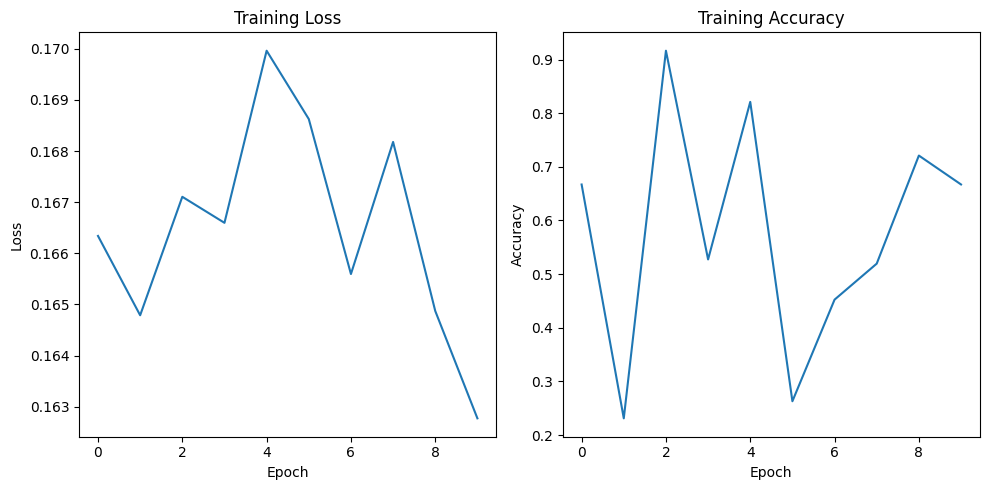

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class SGDWithGradientClipping:
    def __init__(self, learning_rate=0.01, momentum=0.9, clip_value=0.5):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.clip_value = clip_value
        self.velocities = None

    def update(self, weights, gradients):
        if self.velocities is None:
            self.velocities = [np.zeros_like(weight) for weight in weights]

        for i, (weight, gradient) in enumerate(zip(weights, gradients)):
            self.velocities[i] = self.momentum * self.velocities[i] - self.learning_rate * gradient
            clipped_gradient = np.clip(self.velocities[i], -self.clip_value, self.clip_value)
            weights[i] += clipped_gradient

def compute_loss(predictions, labels):
    return np.mean(np.square(predictions - labels))

def compute_gradients(loss, model):
    pass 
def update_parameters(model, optimizer):
    pass 

X_train = np.random.rand(1000, 784)
y_train = np.random.rand(1000, 10)

optimizer = SGDWithGradientClipping(learning_rate=0.01, momentum=0.9, clip_value=0.5)

losses = []
accuracies = []

epochs = 10
for epoch in range(epochs):
    predictions = np.random.rand(len(X_train), 10)
    loss = compute_loss(predictions, y_train)
    gradients = compute_gradients(loss, None) 

    update_parameters(None, optimizer)

    accuracy = np.random.rand()
    losses.append(loss)
    accuracies.append(accuracy)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {accuracy}')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()
